# Image Classification and Seguementation

- images is nothing more but a matrix of numbers
- a grayscale image is a two-dimensional matrix with values ranging from 0 to 255. 
- read the grayscale image using OpenCV or Python-PIL, convert to a numpy array and ravel (flatten) the matrix.
- RGB images, then you have three matrices instead of one. But the idea remains the same.

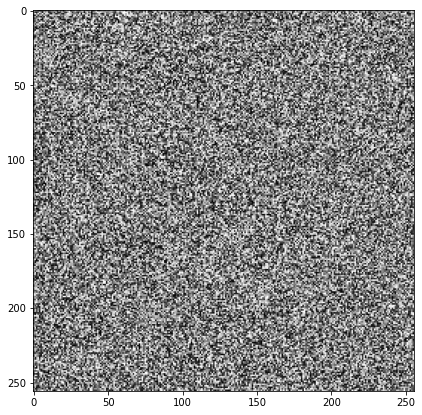

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate random numpy array with values from 0 to 255
# and a size of 256x256
random_image = np.random.randint(0, 256, (256, 256))

# initialize plot
plt.figure(figsize=(7, 7))

# show grayscale image, nb: cmap, vmin and vmax
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.show()

The ravelled version is nothing but a vector of size M, where M= N * N. In this case, this vector is of the size 256 * 256 = 65536 that represent s the number of features for this image.

In [6]:
random_image[0].shape

(256,)

In [7]:
random_image.shape

(256, 256)

## Predict if a lung has pneumothorax or not

Dataset: https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation

After a process of cleaning the dataset has 
- 10675 unique images 
- and 2379 have pneumothorax 

This is a classic case of skewed binary classification.
- evaluation metric: AUC 
- stratified k-fold cross-validation scheme.

The next approach shows how we can develope solutions with a standard classifiers. Nowadays, the best choice is use Neural Networks.

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd

from PIL import Image
from sklearn import model_selection, ensemble, metrics
from tqdm import tqdm

def create_dataset(training_df, image_dir):
    """
    This function takes the training dataframe
    and outputs training array and labels
    :param training_df: dataframe with ImageId, Target columns
    :param image_dir: location of images (folder), string
    :return: X, y (training array with features and labels)
    """
    
    # list to store image vectors
    images = []
    # list to store targets
    targets = []
    
    # loop over dataframe
    for index, row in tqdm (training_df.iterrows(),
                           total = len(train_df),
                           desc = "processing images"):
        # get image id
        image_id = row["ImageId"]
        
        # create image path
        image_path = os.path.join(image_dir, image_id)
        
        # open image using PIL
        image = Image.open(image_path + ".png")
        
        # resize image to 256x256. we use bilinear resampling
        image = image.resize((256, 256), resample=Image.BILINEAR)
        
        # convert image to array
        image = np.array(image)
        
        # ravel
        image = image.ravel()
        
        # append images and targets lists
        images.append(image)
        targets.append(int(row["target"]))
    
    # convert list of list of images to numpy array
    images = np.array(images)
    
    # print size of this array
    print(images.shape)
    
    return images, targets
        
    
if __name__ == "__main__":
    
    # Define dataset paths
    csv_path = "../input/train.csv"
    image_path = "../input/train_png/"
    
    # Read train data  
    df = pd.read_csv(csv_path")
    
    # create a collumn named kfold and fill it with -1
    df["kfold"] = -1
    
    # randomize rows of that datset
    df = df.sample(frac=1).reset_index(drop=True)
    
    # select target values
    y = df.target.values
    
    # instatiate Stratified kfold
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_,kfold] = f
    
    # In each folds 
    # create train and test, create test samples
    # define the classifier, make and print predicts
    for fold_ in range(5):
        
        #create train and test
        train_df = df[df.kfold != fold_].reset_index(drop=True)
        test_df = df[df.kfold == fold_].reset_index(drop=True)
        
        # create train dataset
        # to save computation time move this to outside
        xtest, ytest = create_dataset(train_df, image_path)
        
        # instatiate classifier and fit the model
        # to train dataset
        clf = ensemble.RandomForestClassifier(n_jobs= -1)
        clf.fit(xtrain, ytrain)
        
        # make predictions of class 1
        preds = clf.predict_probab(xtest)[:, 1]
        
        # print results
        print(f"FOLD: {fold_}")
        print(f"AUC = {metrics.roc_auc_score(ytest, preds)}")
        print("")

In PyTorch, the image notation is BS, C, H, W, where,
BS is the batch size, C channels, H is height and W is the width. Let’s see how **AlexNet is implemented in PyTorch.**

**AlexNet Paper**
https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

**From ALexNet Paper:**

The first convolutional layer filters the 224×224×3 input image with 96 kernels of size 11×11×3 with a stride of 4 pixels.

The second convolutional layer takes as input the (response-normalized
and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.

The third convolutional layer has 384 kernels of size 3 × 3 ×
256 connected to the (normalized, pooled) outputs of the second convolutional layer.

The fourth
convolutional layer has 384 kernels of size 3 × 3 × 192 , and the fifth convolutional layer has 256
kernels of size 3 × 3 × 192. 

The fully-connected layers have 4096 neurons each.

**About Max Pooling**
This is what we use throughout our network, with s = 2 and z = 3.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class AnexNet(nn.Module):
    super(AlexNet, self).__init__()
    # convolution part
    self.conv1 = nn.Conv2d(in_channels=3,
                          out_channels=96,
                          kernel_size=11,
                          stride=4,
                          padding =2)    
    
    self.pool1 = n.MaxPool2d(kernel_size=3, stride=2)
    
    self.conv2 = nn.Conv2d(in_channels=96,
                          out_channels=256,
                          kernel_size=5,
                          stride=1,
                          padding =2)
    
    self.pool2 = n.MaxPool2d(kernel_size=3, stride=2)
    
    self.conv3 = nn.Conv2d(in_channels=256,
                          out_channels=384,
                          kernel_size=3,
                          stride=1,
                          padding =1)
    
    self.conv4 = nn.Conv2d(in_channels=384,
                          out_channels=192,
                          kernel_size=3,
                          stride=1,
                          padding =1)
    
    self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
    
    # dense part
    self.fc1 = nn.Linear(in_features=9216,
                        out_features=4096)
    
    self.dropout1 = nn.Dropout(0.5)
    
    self.fc2 = nn.Linear(in_features=4096,
                        out_features=4096)
    
    self.droput2 = nn.Dropout(0.5)
    
    self.fc3 = nn.Linear(in_features=4096,
                        out_features=1000)
    
def forward(self, image):
    # get the batch size, channels, height and width
    # of the input batch of images
    
    # original size: (bs, 3, 227, 227)
    bs, c, h, w = image.size()
    
    x = F.relu(self.conv1(image)) # size: (bs, 96, 55, 55)
    x = self.pool1(x) # size: (bs, 96, 27, 27)
    
    x = F.relu(self.conv2(x)) # size: (bs, 256, 27, 27)
    x = self.pool2(x) # size: (bs, 256, 13, 13)
    
    x = F.relu(self.conv3(x)) # size: (bs, 384, 13, 13  
    
    x = F.relu(self.conv4(x)) # size: (bs, 256, 13, 13)
    
    x = self.pool3(x) # size: (bs, 256, 6, 6)
    
    x = x.view(bs, -1) # size: (bs, 9216)
    
    x = F.relu(self.fc1(x)) # size: (bs, 4096)
    
    x = self.dropout1(x) # size: (bs, 4096)
    
    # dropout does not change size
    # dropout is used for regularization
    # 0.3 dropout means that only 70% of the nodes
    # of the current layer are used for the next layer
    x = F.relu(self.fc2(x)) # size: (bs, 4096)
    x = self.dropout2(x) # size: (bs, 4096)
    x = F.relu(self.fc3(x)) # size: (bs, 1000)
    # 1000 is number of classes in ImageNet Dataset
    # softmax is an activation function that converts
    # linear output to probabilities that add up to 1
    
    